# Robot Vision Notebook (COMP34212)

In [64]:
# Imports
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

### Data Pre-Processing

In [56]:
import os
import cv2
import numpy as np

# Path to the folder containing images
folder_path = 'path/to/your/images/folder'

# Initialize an empty list to store images
image_list = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you might want to add more checks here)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Read the image using OpenCV
        image = cv2.imread(file_path)
        # Append the image to the list
        if image is not None:
            image_list.append(image)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Now image_array contains all your images in a NumPy array
print("Shape of image array:", image_array.shape)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path/to/your/images/folder'

In [105]:
IMAGES_PATH = "icub"

In [111]:
objects = os.listdir(IMAGES_PATH)

mapping = {object_name: object_index for object_index, object_name in enumerate(objects)}

print(mapping)

{'book': 0, 'cellphone': 1, 'mouse': 2, 'pencilcase': 3, 'ringbinder': 4}


In [112]:
# Input images
image_dataset_x = []
image_dataset_y = []

def input_images(path):
    """Cycles through folder structure inputting images and classifications to x and y lists"""
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            input_images(item_path)
        else:
            if item_path.endswith(".jpg"):
                image = cv2.imread(item_path)
                if image.shape == (256, 256, 3):
                    image_dataset_x.append(image)
                    category = item_path.split("\\")[1]
                    image_dataset_y.append(mapping.get(category))
                    print(item_path)

input_images(IMAGES_PATH)

icub\book\book1\MIX\day5\left\00005935.jpg
icub\book\book1\MIX\day5\left\00005936.jpg
icub\book\book1\MIX\day5\left\00005937.jpg
icub\book\book1\MIX\day5\left\00005938.jpg
icub\book\book1\MIX\day5\left\00005939.jpg
icub\book\book1\MIX\day5\left\00005940.jpg
icub\book\book1\MIX\day5\left\00005941.jpg
icub\book\book1\MIX\day5\left\00005942.jpg
icub\book\book1\MIX\day5\left\00005943.jpg
icub\book\book1\MIX\day5\left\00005944.jpg
icub\book\book1\MIX\day5\left\00005945.jpg
icub\book\book1\MIX\day5\left\00005946.jpg
icub\book\book1\MIX\day5\left\00005947.jpg
icub\book\book1\MIX\day5\left\00005948.jpg
icub\book\book1\MIX\day5\left\00005949.jpg
icub\book\book1\MIX\day5\left\00005950.jpg
icub\book\book1\MIX\day5\left\00005951.jpg
icub\book\book1\MIX\day5\left\00005952.jpg
icub\book\book1\MIX\day5\left\00005953.jpg
icub\book\book1\MIX\day5\left\00005954.jpg
icub\book\book1\MIX\day5\left\00005955.jpg
icub\book\book1\MIX\day5\left\00005956.jpg
icub\book\book1\MIX\day5\left\00005957.jpg
icub\book\b

KeyboardInterrupt: 

In [113]:
# Convert lists into np.arrays
image_dataset_x = np.array(image_dataset_x)
image_dataset_y = np.array(image_dataset_y)

In [114]:
# Print shapes of both np arrays
print(image_dataset_x.shape)
print(image_dataset_y.shape)

(3452, 256, 256, 3)
(3452,)


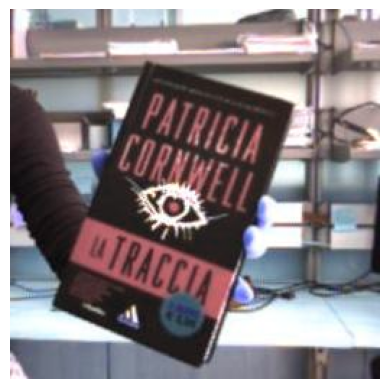

In [116]:
# Display sample image
plt.imshow(image_dataset_x[0])
plt.axis('off') 
plt.show()

In [117]:
IMG_CHANNELS = 3
IMG_ROWS = 256
IMG_COLS = 256
N_CLASSES = len(os.listdir(IMAGES_PATH))

In [118]:
# Split dataset into training and testing
input_X_train, input_X_test, output_y_train, output_y_test = train_test_split(image_dataset_x, image_dataset_y, test_size=0.2, random_state=42, stratify=image_dataset_y)

In [119]:
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

In [120]:
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

### Model Construction, Training & Evaluation

In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [ ]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


In [ ]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
